# **CADlingo** 
### **Initial Setup**

---

This notebook verifies that:
1. All dependencies are installed correctly
2. Project structure exists
3. Data loading functions
4. Data exploration

### 1. Import Dependencies & Verify Installation

In [1]:
# Check Python and package versions
import sys
import numpy as np
import pandas as pd
import matplotlib
import seaborn as sns
import torch
import ezdxf
print('Python:', sys.version)
print('Numpy:', np.__version__)
print('Pandas:', pd.__version__)
print('Matplotlib:', matplotlib.__version__)
print('Seaborn:', sns.__version__)
print('Torch:', torch.__version__)
print('ezdxf:', ezdxf.__version__)

Python: 3.11.14 (main, Oct  9 2025, 16:16:55) [Clang 17.0.0 (clang-1700.0.13.3)]
Numpy: 1.24.3
Pandas: 2.0.3
Matplotlib: 3.7.2
Seaborn: 0.12.2
Torch: 2.0.1
ezdxf: 1.0.3


### 2. Project Structure Verification

In [2]:
# List main project folders and files (check parent directory)
import os

base = os.path.abspath(os.path.join(os.getcwd(), '..'))
for name in ['data', 'src', 'notebooks', 'results', 'ui', 'README.md', 'requirements.txt']:
    path = os.path.join(base, name)
    print(f"{name}:", 'Exists' if os.path.exists(path) else 'Missing')

data: Exists
src: Exists
notebooks: Exists
results: Exists
ui: Exists
README.md: Exists
requirements.txt: Exists


### 3. Dataset Loading & Summary

In [5]:
import glob
import pickle
import pandas as pd
import os

# Get project root (parent of notebooks/)
base = os.path.abspath(os.path.join(os.getcwd(), '..'))
data_path = os.path.join(base, 'data', 'raw', 'pickle', 'train', '*.pickle')
sample_files = glob.glob(data_path)

if sample_files:
    with open(sample_files[0], 'rb') as f:
        data = pickle.load(f)
    print('Sample keys:', list(data.keys()))
    # Show summary if possible
    if 'rooms' in data:
        print('Number of rooms:', len(data['rooms']))
        print('Room types:', set(r['type'] for r in data['rooms']))
else:
    print('No RPLAN pickle files found. Please run src/data/downloader.py to download.')

Sample keys: ['rooms']
Number of rooms: 3
Room types: {'bathroom', 'kitchen', 'bedroom'}


### 4. Sample Data Exploration

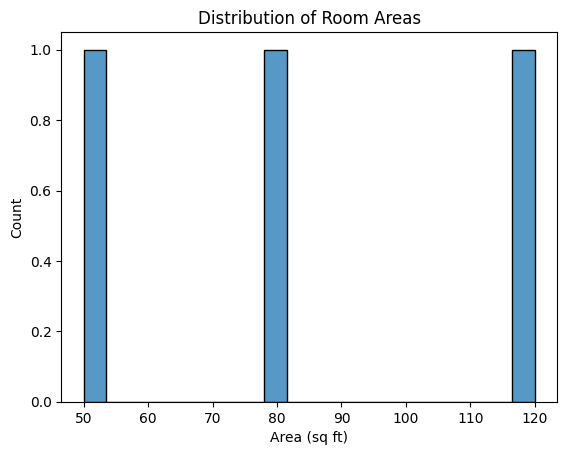

In [6]:
# If data loaded, show a simple plot (room areas)
import matplotlib.pyplot as plt
import seaborn as sns

if 'data' in locals() and 'rooms' in data:
    areas = [r['area'] for r in data['rooms'] if 'area' in r]
    sns.histplot(areas, bins=20)
    plt.title('Distribution of Room Areas')
    plt.xlabel('Area (sq ft)')
    plt.ylabel('Count')
    plt.show()
else:
    print('No room data available for plotting.')

### **Data Directories**

---

In [11]:
# list existing data directories
data_dir = os.listdir('../data')
print("Existing data directories:", data_dir)

Existing data directories: ['.DS_Store', '.gitkeep', 'processed', 'outputs', 'raw']


In [10]:
# list existing data directories
data_dirs = ['train', 'val', 'test']
for dir_name in data_dirs:
    data_dir = os.path.join(base, 'data', 'raw', 'pickle', dir_name)
    if os.path.exists(data_dir):
        print(f"Data directory '{dir_name}' exists.")
    else:
        print(f"Data directory '{dir_name}' is missing.")

Data directory 'train' exists.
Data directory 'val' exists.
Data directory 'test' is missing.


In [ ]:
# List existing data files
data_dir = os.path.join(base, 'data', 'raw', 'pickle', 'train')
files = os.listdir(data_dir)
print(f"Data files in {data_dir}:")
for fname in files:
    print('-', fname)

Data files in /Users/ramya/Desktop/Ramya/UF Sem3/AML2/CADlingo/data/raw/pickle/train:
- 53554.pkl
- 15501.pkl
- 8375.pkl
- 44028.pkl
- 7046.pkl
- 24904.pkl
- 73684.pkl
- 62951.pkl
- 52892.pkl
- 43747.pkl
- 63497.pkl
- 1437.pkl
- 42459.pkl
- 35809.pkl
- 62789.pkl
- 18025.pkl
- 78909.pkl
- 71093.pkl
- 51343.pkl
- 17316.pkl
- 61280.pkl
- 10479.pkl
- 67829.pkl
- 57732.pkl
- 5889.pkl
- 11767.pkl
- 3220.pkl
- 58401.pkl
- 47521.pkl
- 76924.pkl
- 16008.pkl
- 30971.pkl
- 47247.pkl
- 67197.pkl
- 28858.pkl
- 2880.pkl
- 37978.pkl
- 57054.pkl
- 11001.pkl
- 3546.pkl
- 40528.pkl
- 58367.pkl
- 77384.pkl
- 28680.pkl
- 59079.pkl
- 39955.pkl
- 41636.pkl
- 26875.pkl
- 46159.pkl
- 5137.pkl
- 18743.pkl
- 60820.pkl
- 51425.pkl
- 66289.pkl
- 38493.pkl
- 14179.pkl
- 65780.pkl
- 74855.pkl
- 32800.pkl
- 45450.pkl
- 75593.pkl
- 55643.pkl
- 13616.pkl
- 65958.pkl
- 43021.pkl
- 12508.pkl
- 53232.pkl
- 7720.pkl
- 32814.pkl
- 52138.pkl
- 65794.pkl
- 9719.pkl
- 45444.pkl
- 49.pkl
- 75587.pkl
- 1345.pkl
- 13602.pkl
- 55

In [9]:
# List existing data files
data_dir = os.path.join(base, 'data', 'raw', 'pickle', 'val')
files = os.listdir(data_dir)
print(f"Data files in {data_dir}:")
for fname in files:
    print('-', fname)   

Data files in /Users/ramya/Desktop/Ramya/UF Sem3/AML2/CADlingo/data/raw/pickle/val:
- 55125.pkl
- 13170.pkl
- 45336.pkl
- 6358.pkl
- 5651.pkl
- 41150.pkl
- 69804.pkl
- 48612.pkl
- 4229.pkl
- 48174.pkl
- 2658.pkl
- 17470.pkl
- 1351.pkl
- 44996.pkl
- 15267.pkl
- 8413.pkl
- 74841.pkl
- 8407.pkl
- 57040.pkl
- 77390.pkl
- 26861.pkl
- 17464.pkl
- 18031.pkl
- 49518.pkl
- 51357.pkl
- 69810.pkl
- 57726.pkl
- 76930.pkl
- 62945.pkl
- 7052.pkl
- 45322.pkl
- 20586.pkl
- 49530.pkl
- 59723.pkl
- 40272.pkl
- 19307.pkl
- 4573.pkl
- 80730.pkl
- 35835.pkl
- 73860.pkl
- 9057.pkl
- 16752.pkl
- 28864.pkl
- 50707.pkl
- 68298.pkl
- 57068.pkl
- 10323.pkl
- 56376.pkl
- 4201.pkl
- 71905.pkl
- 26685.pkl
- 37950.pkl
- 9725.pkl
- 12520.pkl
- 43009.pkl
- 7708.pkl
- 44000.pkl
- 73874.pkl
- 35821.pkl
- 11997.pkl
- 41178.pkl
- 30781.pkl
- 56404.pkl
- 3208.pkl
- 50075.pkl
- 75236.pkl
- 33263.pkl
- 72559.pkl
- 35612.pkl
- 25401.pkl
- 25367.pkl
- 55858.pkl
- 23716.pkl
- 74896.pkl
- 45493.pkl
- 606.pkl
- 44955.pkl
- 16975.